## Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: /datasets/games.csv.

## Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

## Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

## Шаг 4. Составьте портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

## Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.
- Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

## Шаг 6. Напишите общий вывод

- Оформление: Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

---

# Шаг 1 Откроем файл с данными и изучим общую информаци

In [1]:
# Иvпортируем библиотеки 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Читаем датасет
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Визуально оценим файл
df.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**
    
    По окончанию 1 шага, Имеем 16715 записей и 11 столбцов.Необходимо заменить типы данных,обработать пропуски и 0

---

# Шаг 2. Подготовка данных

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [6]:
# Приводим все названия столбцов к нижнему регисру методом str.lower()
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
# переведом строку с датой релиза игры в datetime
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format="%Y")# меняем тип данных на to_datetime
df['year'] = df['year_of_release'].dt.year #Создаём столбец с годом
df['year'] = df['year'].fillna(0) # избавимся от NAN иначе тип данных не преобразуется
df['year'] = df['year'].astype('int') # переведем в int
del df['year_of_release'] # удалим старый стобец с датой
df.head(3)

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008


In [8]:
#рейтинг K-A заменим на E
df['rating'] = df['rating'].replace('K-A', 'E')

В столбцах year_of_release и user_score заменим тип данных, предварительно заменив пропущенные значение на нетипичное -1. Год выпуска - это целое число, поэтому эти значения будут указаны в формате int64, а оценка пользователей - невещественное число, приведем эти значения к формату float64.

In [9]:
# Замним на -1 в дальнейшем будем учитывать
df['user_score'] = df['user_score'].fillna(-1)

In [10]:
# подсчёт пропусков
df.isna().sum()

name               2
platform           0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score         0
rating          6766
year               0
dtype: int64

In [11]:
df

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,NaN,-1,NaN,1985
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80.0,8,E,2009
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1,NaN,1996
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,NaN,-1,NaN,2016
16711,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,NaN,-1,NaN,2006
16712,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,NaN,-1,NaN,2016
16713,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,NaN,-1,NaN,2003


In [12]:
# ПОИСК СТРОК С ПРОПУКАМИ
df[pd.isnull(df['genre'])] # Нашли 2 строки с пропущенными значениями по названию и жанру. Удаляем

#Считаем процентное соотношение пропусков
#df.isnull().sum().sort_values(ascending = False) / df.shape[0] * 100

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
659,NaN,GEN,NaN,1.78,0.53,0.00,0.08,NaN,-1,NaN,1993
14244,NaN,GEN,NaN,0.00,0.00,0.03,0.00,NaN,-1,NaN,1993


In [13]:
# Удалим пропуски из столбцов (name и genre) они в одних и тех же строчках.НА иследование не повлияют
df.dropna(subset = ['name'], inplace = True)
df.isna().sum()

name               0
platform           0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8576
user_score         0
rating          6764
year               0
dtype: int64

В **user_score** мы уже заполнили пропуски нетипичным значением -1. Сделаем то же самое с пропусками в **critic_score и rating**, а затем будем учитывать это в дальнейшей работе. Это поможет нам сохранить данные и не повлиять на результаты исследования.

In [14]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['rating'] = df['rating'].fillna(-1)

In [15]:
#наблюдения со значением tbd в столбце user_score заменим на -1. Так эти значения не помешают при дальнейших рассчетах
df['user_score'] = df['user_score'].replace('tbd', -1)
df['user_score'] = pd.to_numeric(df['user_score'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    16713 non-null float64
user_score      16713 non-null float64
rating          16713 non-null object
year            16713 non-null int64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
# Посчитайте количество продаж во всех регионах и запишите в отдельный столбец
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,82.54
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,1985,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,1996,31.38


**Вывод:**

Создали столбец с годом выпуска игры.Избавились о пропущенных значений в столбцах (name и genre). В столбце user_score, заменили tbd на nan. Так как значение не определено.Посчитали тотал доход от игр.

В столбцах critic_score, user_score,rating NAN заменили на -1, для дальнейшего просчета данных. -1 необычное значение будем это учитывать.

---

# Шаг 3. Проведите исследовательский анализ данных

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


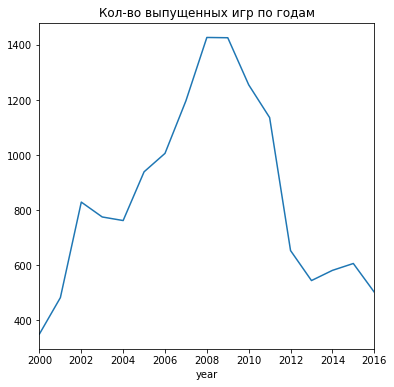

In [18]:
# выведем график с показанием от 2000 года
game_year = df.query('year >= 2000').groupby('year')['name'].count()
game_year.plot(figsize=(6, 6), title='Кол-во выпущенных игр по годам');

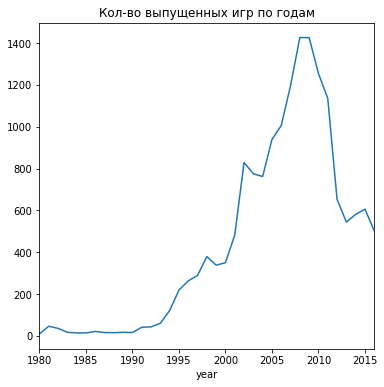

In [19]:
# выведем график с показанием от 1980 года
game_year = df.query('year >= 1980').groupby('year')['name'].count()
game_year.plot(figsize=(6, 6), title='Кол-во выпущенных игр по годам');

По граффикам видно что с 1995 года, пошел  резких подьем выпуска игр.Пик выпуска приходится на 2008 год. 
P.S. Верните ме мой 2008

In [20]:
# Построим сводную таблицу и посмотрим как менялись продажи на приставках по годам
df.query('year > 2000').pivot_table(index='platform', columns='year', values='name', aggfunc='count', fill_value='-')

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,116,93,91,80,86,46
DC,8,1,-,-,-,-,1,1,-,-,-,-,-,-,-,-
DS,-,-,-,23,118,201,376,492,403,323,153,23,8,-,-,-
GB,10,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,107,198,150,175,135,39,6,-,-,-,-,-,-,-,-,-
GC,22,152,144,83,97,40,4,-,-,-,-,-,-,-,-,-
N64,9,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-
PC,15,19,33,30,37,52,62,76,107,90,139,61,38,47,50,54
PS,91,20,3,-,-,-,-,-,-,-,-,-,-,-,-,-


**Видно что имеем периоды когда поколение одних приставок заканчивается и на смену им приходят новые или обновленные версии.**

Для дальнейшего исследования нам будет вполне достаточно последних 2 года. Оставим данные с 2015 года по 2016 включительно.

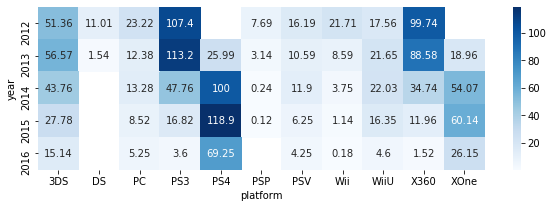

In [21]:
platform_sales_pivot = df.query('year >= 2012').pivot_table(index = 'year', columns = 'platform', 
                  values = 'total_sales', aggfunc = 'sum')
plt.figure(figsize = (10, 3))
sns.heatmap(platform_sales_pivot, annot = True, fmt='.4g', cmap = "Blues")
plt.show()

In [22]:
df_new = df.query('year >= 2015')
#найдем платформы с наибольшими суммарными продажами за 2 года
platform_sales = df_new.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
platform_sales.head(10)

,platform,total_sales
0,PS4,188.15
1,XOne,86.29
2,3DS,42.92
3,WiiU,20.95
4,PS3,20.42
5,PC,13.77
6,X360,13.48
7,PSV,10.50
8,Wii,1.32
9,PSP,0.12


**ТОП 3 платформы разделили (PS4,XOne,3DS)**

Text(0.5, 0, 'Выручка, млн дол.')

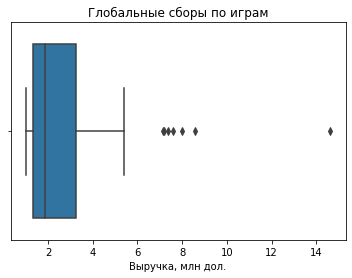

In [23]:
# Строим ящик с усами
#берем только те игры, общие продажи которых больше 1 млн долларов
g = df_new.query('total_sales > 1')
ax = sns.boxplot('total_sales', data= g);
ax.set_title('Глобальные сборы по играм')
ax.set_xlabel('Выручка, млн дол.')

Text(0.5, 0, 'Выручка, млн дол.')

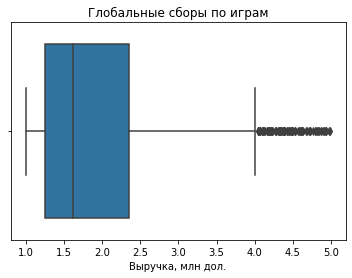

In [24]:
#Убираем выбросы находящиеся за cвыше 5 млн
new_bp=df.query('total_sales > 1 and total_sales < 5')
ax = sns.boxplot('total_sales', data= new_bp);
ax.set_title('Глобальные сборы по играм')
ax.set_xlabel('Выручка, млн дол.')

Разница в продажах игр очень велика. Нормальные значения продаж не превышают 7-8 миллионов долларов, но при этом на графике очень много выбросов (больших значений), и есть даже такие игры, продажи которых принесли аж 80 млн долларов.

Text(0.5, 0, 'Выручка, млн дол.')

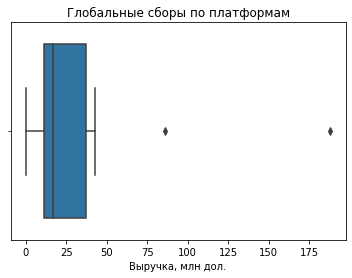

In [25]:
p = df_new.groupby('platform')['total_sales'].sum().reset_index()
ax = sns.boxplot('total_sales', data=p)
ax.set_title('Глобальные сборы по платформам')
ax.set_xlabel('Выручка, млн дол.')

platform
3DS     0.090
PC      0.050
PS3     0.060
PS4     0.120
PSP     0.020
PSV     0.030
Wii     0.150
WiiU    0.215
X360    0.110
XOne    0.130
Name: total_sales, dtype: float64

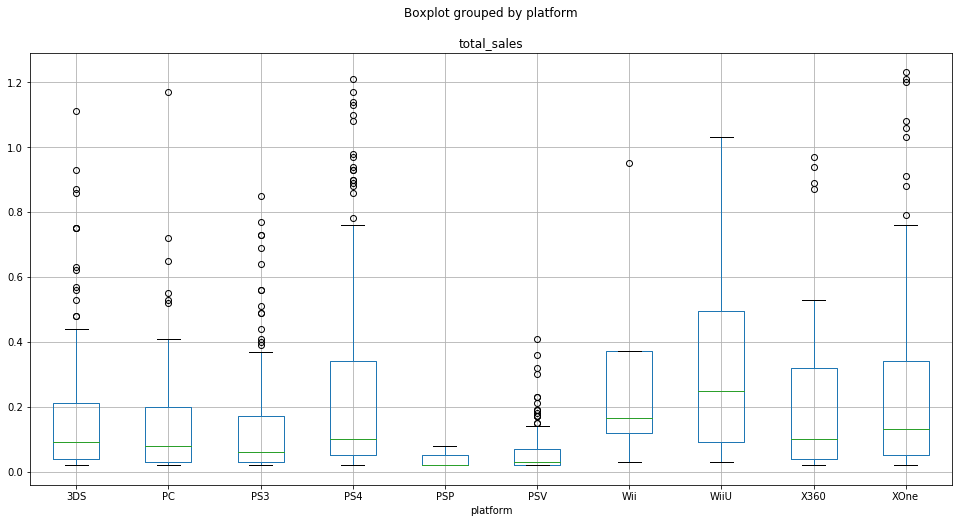

In [26]:
import warnings
warnings.filterwarnings('ignore')
new_qw=df_new.query('total_sales > 0.01 and total_sales < 1.25')
new_qw.boxplot('total_sales', by='platform',figsize=(16, 8));
#df_new.groupby('platform')['total_sales'].describe()
df_new.groupby('platform')['total_sales'].median()

Основная часть значений находится в промежутке 50 - 400, также видим хвост из больших значений, которые однако не влияют на медиану.

Text(0, 0.5, '')

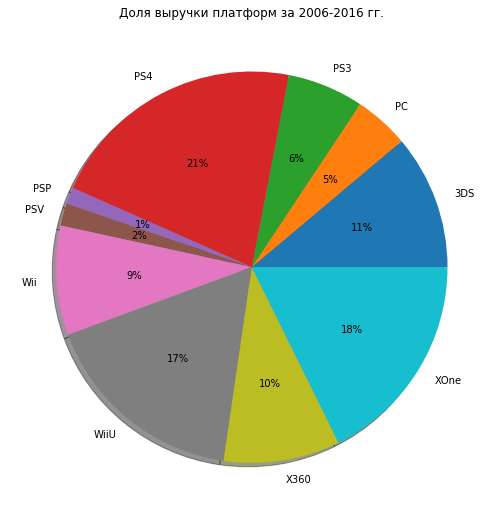

In [27]:
#посмотрим на среднюю выручку платформ по годам за выбранный период
revenue_mean = df_new.groupby('platform')['total_sales'].mean()
revenue_mean.plot(kind='pie', figsize=(9, 9), autopct='%1.0f%%', shadow=True, title='Доля выручки платформ за 2006-2016 гг.')
ax = plt.gca()
ax.set_ylabel('')

За выбранный период есть несколько лидеров по средним продажам - PS4 (эту платформу мы уже отметили ранее), XOne, Wii и 3DS.

- Посмотрим, как влияют на продажи внутри одной популярной  -платформы (PS4) отзывы пользователей и критиков. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

### Диаграмма рассеивания PS4

In [28]:
#выделим в отдельную таблицу продажи по PS4
game_stat_ps4 = df_new.query('platform == "PS4"and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

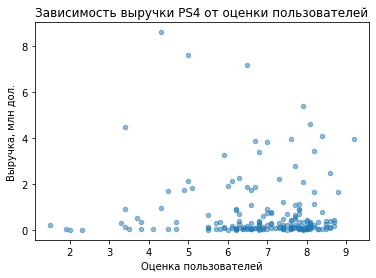

In [29]:
# Строим диаграмму рассеивания
game_stat_ps4.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')


In [30]:
#Считаем корреляцию пользователей
game_stat_ps4['total_sales'].corr(game_stat_ps4['user_score'])

-0.06436843081030288

Text(0.5, 0, 'Оценка критиков')

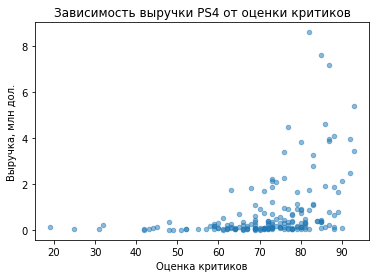

In [31]:
# Строим диаграмму рассеивания
game_stat_ps4.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки PS4 от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [32]:
# Считаем корреляцию критиков
game_stat_ps4['total_sales'].corr(game_stat_ps4['critic_score'])

0.3920741369660568

И по графикам, и по значению корреляции видим, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей. Больше всего выручка при оценке критиков 60 и выше.

### Диаграмма рассеивания по тотал платформам

Text(0.5, 0, 'Оценка пользователей')

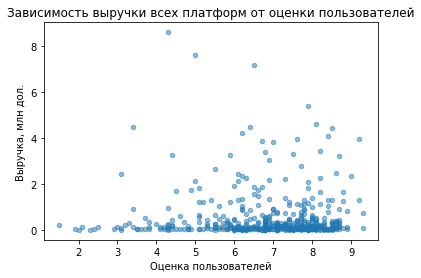

In [33]:
# Посмотрим, как графики и корреляция будут выглядеть для всех десяти платформ.
game_stat_new_filtered = df_new.query('user_score != -1 and critic_score != -1')
game_stat_new_filtered.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки пользователей')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [34]:
game_stat_new_filtered['total_sales'].corr(game_stat_new_filtered['user_score'])

-0.014618298703672263

Text(0.5, 0, 'Оценка критиков')

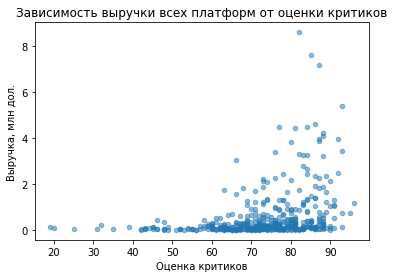

In [35]:
game_stat_new_filtered.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки всех платформ от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [36]:
game_stat_new_filtered['total_sales'].corr(game_stat_new_filtered['critic_score'])

0.32337465925659875

### Диаграмма рассеивания XOne

In [37]:
#выделим в отдельную таблицу продажи по XOne
game_stat_XOne = df_new.query('platform == "XOne"and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

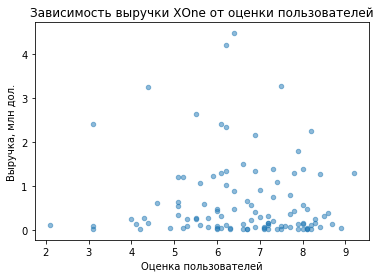

In [38]:
# Посмотрим, как графики и корреляция будут выглядеть для XOne.
game_stat_XOne.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки XOne от оценки пользователей');
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [39]:
game_stat_XOne['total_sales'].corr(game_stat_XOne['user_score'])

-0.06868389218473443

Text(0.5, 0, 'Оценка критиков')

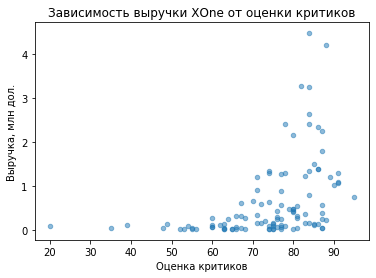

In [40]:
game_stat_XOne.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки XOne от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [41]:
game_stat_XOne['total_sales'].corr(game_stat_XOne['critic_score'])

0.4225192624742895

**Нет взамосвязи между оценками пользователей и продажам. -0,06 интерпретируем как отсутствие взаимосвязи.**

---

### Диаграмма рассеивания 3DS

In [42]:
#выделим в отдельную таблицу продажи по 3DS
game_stat_3DS = df_new.query('platform == "3DS"and user_score != -1 and critic_score != -1')

Text(0.5, 0, 'Оценка пользователей')

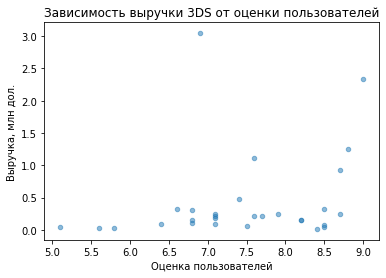

In [43]:
# Посмотрим, как графики и корреляция будут выглядеть для 3DS.
game_stat_3DS.plot(y='total_sales', x='user_score', kind='scatter', alpha=0.5, title='Зависимость выручки 3DS от оценки пользователей');
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка пользователей')

In [44]:
game_stat_3DS['total_sales'].corr(game_stat_3DS['user_score'])

0.24047698587957067

Text(0.5, 0, 'Оценка критиков')

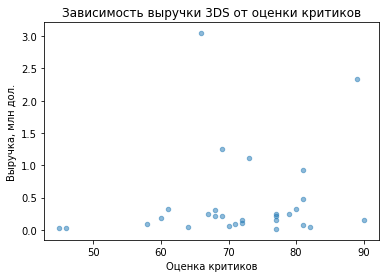

In [45]:
game_stat_3DS.plot(y='total_sales', x='critic_score', kind='scatter', alpha=0.5, title='Зависимость выручки 3DS от оценки критиков')
ax = plt.gca()
ax.set_ylabel('Выручка, млн дол.')
ax.set_xlabel('Оценка критиков')

In [46]:
game_stat_3DS['total_sales'].corr(game_stat_3DS['critic_score'])

0.17757455046092874

**С 3DS плтаформой наблюдаем слабю положительную корреляцию.**

При взгляде на два последних графика можно заметить, что разница в корреляции оценка критика/выручка и оценка пользователя/выручка совсем **небольшая**. Для платформы PS4 и XOne она заметнее, а корреляция оценка критика/выручка **сильнее**.В отличии от 3DS

- Посмотрим на общее распределение игр по жанрам.

In [47]:
# Общие продажи по жанрам
df_new.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,105.73
Action,102.13
Sports,64.33
Role-Playing,55.82
Misc,14.17
Fighting,12.37
Adventure,11.98
Racing,10.86
Platform,9.28


In [48]:
# Медиананые продажи по жанрам
df_new.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.380
Sports,0.120
Role-Playing,0.115
Platform,0.100
Simulation,0.100
Fighting,0.090
Action,0.060
Misc,0.060
Racing,0.055


Из сводных таблиц видно по 2 метрикам **(Тотал и медиана)**, что с большим отрывом по продажам лидируют игры жанра **Shooter**. Самые низкие сборы у жанров **Puzzle**.

**Вывод:**

Провели исследовательский анализ данных, выделили срез данных за 2015-2016 гг, нашли 10 платформ-лидеров по продажам.

На примере PS4 рассмотрели корреляцию оценка критика/выручка и оценка пользователя/выручка и пришли к выводу, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.

Больше всего выручка у платформы при оценке критиков 60 и выше.

Самыми прибыльными оказались жанры Shooter.

Самые низкие сборы у жанров Puzzle.

---

# Шаг 4. Составим портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


In [49]:
df

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,2006,82.54
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,1985,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,1996,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,2016,0.01
16711,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,-1,2006,0.01
16712,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,2016,0.01
16713,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,-1,2003,0.01


In [50]:
# Cеверная Америка
df_new.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()

,platform,na_sales
3,PS4,63.86
9,XOne,50.30
0,3DS,10.31
7,WiiU,8.86
8,X360,8.05


In [51]:
df_new.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()

,genre,na_sales
8,Shooter,48.18
0,Action,33.68
10,Sports,26.31
7,Role-Playing,19.82
3,Misc,5.58


In [52]:
df_new.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()

,rating,na_sales
3,M,47.03
0,-1,37.44
1,E,26.59
4,T,22.86
2,E10+,17.87


- в Северной Америке лидируют платформы PS4, XOne и 3DS, разница в продажах не очень велика
- самые популярные жанры - Action, Sports,Shooter, Misc и Role-Playing
- с большим отрывом по продажам лидирует рейтинг M, затем идут -1 и E

In [53]:
# Cеверная Европе
df_new.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()

,platform,eu_sales
3,PS4,83.54
9,XOne,28.10
1,PC,9.10
0,3DS,7.39
2,PS3,7.30


In [54]:
df_new.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()

,genre,eu_sales
8,Shooter,40.28
0,Action,34.82
10,Sports,27.82
7,Role-Playing,17.21
6,Racing,6.52


In [55]:
df_new.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()

,rating,eu_sales
3,M,45.54
0,-1,35.71
1,E,34.83
4,T,20.32
2,E10+,11.54


- в Европе лидируют все те же приставки, но распределение немного другое, здесь в топе PS4, затем XOne и PC
- самые популярные жанры все те же - Action, Sports,Shooter, Misc. Жанра Role-Playing, который был в топе по СА, здесь нет, зато есть Racing.
- также лидируют рейтинги M , -1 , E

In [56]:
# Япония
df_new.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()

,platform,jp_sales
0,3DS,23.55
3,PS4,12.05
5,PSV,8.41
2,PS3,4.97
7,WiiU,4.12


In [57]:
df_new.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()

,genre,jp_sales
0,Action,23.05
7,Role-Playing,13.41
8,Shooter,3.79
3,Misc,3.19
1,Adventure,2.22


In [58]:
df_new.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
#  Методом GROUPBY сгруппируем наши датасеты по ['user_id', 'month']

,rating,jp_sales
0,-1,32.89
4,T,7.70
1,E,5.25
3,M,4.29
2,E10+,3.27


- лидируют совсем другие платформы - 3DS, PS4
- самые популярные жанры - Role-Playing, Shooter, Action. В Японии популярные жанры выглядят более безобидно
- самые большие продажи у рейтингов -1,  E (для всех) и T (для подростков). 

In [59]:
# Другие страны
df_new.groupby('platform')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head()

,platform,other_sales
3,PS4,28.70
9,XOne,7.71
2,PS3,2.49
0,3DS,1.67
7,WiiU,1.48


In [60]:
df_new.groupby('genre')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head()

,genre,other_sales
8,Shooter,13.48
0,Action,10.58
10,Sports,8.55
7,Role-Playing,5.38
2,Fighting,1.57


In [61]:
df_new.groupby('rating')['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending=False).head()

,rating,other_sales
3,M,14.24
0,-1,11.13
1,E,8.57
4,T,6.85
2,E10+,4.00


**Вывод:**
    
    В Северной Америке и Европе картина примерно одинакова:

- лидируют платформы , PS4 и XOne, 3DS с небольшой разницей в распределении продаж.
- самые популярные жанры - Action, Sports,Shooter, Misc
- с большим отрывом по продажам лидирует рейтинг E (для всех), на втором месте M (18+)
- В Японии немного по-другому:

- лидируют совсем другие платформы - 3DS, PS4
- самые популярные жанры - Role-Playing, Platform, Sports, Misc, Action. В Японии популярные жанры выглядят более безобидно
- самые большие продажи у рейтингов E (для всех) и T (для подростков). Похоже, в Японии выбирают более спокойные игры.

**Другие страны:**

для остальных стран портрет потребителя примерно одинаков с потребителями из СА и Европы. Лидируют те же платформы, жанры и рейтинги. Выходит, Япония - достаточно специфический рынок, к которому нужен особый подход в плане рекламных кампаний. Так как Япония является производителем платформ PS,PSP,3DS. Видимо поэтому вкус у пользователей жанров свойхарактерный,например как: **Role-Playing**,

---

# Шаг 5. Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны

H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны

In [62]:
#зададим критический уровень статистической значимости
alpha = 0.05
xone = game_stat_new_filtered.query('platform == "XOne"')
pc = game_stat_new_filtered.query('platform == "PC"')

In [63]:
results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.328025722139469
Не получилось отвергнуть нулевую гипотезу


**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

H₀ - средние пользовательские рейтинги жанров Action и Sports равны

H₁ - средние пользовательские рейтинги жанров Action и Sports не равны

In [64]:
action = game_stat_new_filtered.query('genre == "Action"')
sports = game_stat_new_filtered.query('genre == "Sports"')

In [65]:
results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.5087325539494814e-07
Отвергаем нулевую гипотезу


**Вывод:** Проверили две гипотезы:

средние пользовательские рейтинги платформ Xbox One и PC равны

средние пользовательские рейтинги жанров Action и Sports не равны


# Шаг 6. Общий вывод

В ходе работы:

 - ознакомились с предоставленными данными, выявили ошибки и пропуски в датасете и обработали их: привели названия столбцов к нижнему регистру, преобразовали данные в нужные типы, заполнили пропуски, посчитали суммарные продажи во всех регионах и добавили в датасет.

- провели исследовательский анализ данных, выделили срез данных за 2015-2016 гг

- нашли 10 платформ-лидеров по продажам: XOne, PS4, 3DS, WiiU, PS3, PC, X360, PSV, PSP

- Выяснили, что:

- На примере PS4,XOne,3DS рассмотрели корреляцию оценка критика/выручка и оценка пользователя/выручка и пришли к выводу, что отзывы критиков в большей степени влияют на продажи, чем отзывы пользователей.

- Больше всего выручка у платформы при оценке критиков 60 и выше.

- Самыми прибыльными оказались жанры Shooter.

- Самые низкие сборы у жанров Puzzle.

- Составили портрет пользователей в Северной Америке, Европе и Японии:

- В Северной Америке и Европе картина примерно одинакова:

лидируют платформы XOne, 3DS, PS4 с небольшой разницей в распределении продаж.
самые популярные жанры - Action, Sports,Shooter, Misc
с большим отрывом по продажам лидирует рейтинг E (для всех), на втором месте M (18+)
- В Японии немного по-другому:

лидируют совсем другие платформы - 3DS,PS4
самые популярные жанры - Role-Playing, Platform, Sports, Misc, Action. В Японии популярные жанры выглядят более безобидно
самые большие продажи у рейтингов -1, E (для всех) и T (для подростков). Похоже, в Японии выбирают более спокойные игры.
 - Другие страны:

для остальных стран портрет потребителя примерно одинаков с потребителями из СА и Европы. Лидируют те же платформы, жанры и рейтинги. Выходит, Япония - достаточно специфический рынок, к которому нужен особый подход в плане рекламных кампаний.

- Проверили следующие две гипотезы и первую отвергли,вторую нет (всё же разница между пользовательскими рейтингами платформ и жанров есть):

**средние пользовательские рейтинги платформ Xbox One и PC равны**

**средние пользовательские рейтинги жанров Action и Sports  не равны**

Планируя рекламную кампанию на 2017 год стоит обратить особое внимание на продвижение платформы PS4 (возможности её моификации и выпуска эксклюзивных игр), а также платформ XOne и 3DS, и в особенности игр в жанрах Action, Sports, Shooter.

Стоит также не забывать об особенностях рынка и подстроить рекламу конкретно под него. На примере Японии мы разобрали, как требования потребителей одной страны могут отличаться от предпочтений основной массы пользователей